In [126]:
import pandas as pd
from sklearn.model_selection import train_test_split
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import random
from sklearn.manifold import TSNE
import seaborn as sns
import plotly.express as px

In [127]:
df_x = pd.read_csv("winequality_white_x_train.csv")
df_y = pd.read_csv("winequality_white_y_train.csv")


In [128]:
# reverse one hot
y = df_y.idxmax(axis=1)
y = y.astype(int)

In [129]:
df = pd.concat([df_x, y.rename('y_values')], axis=1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,y_values
0,0.173077,0.196078,0.240964,0.084356,0.074184,0.118467,0.252900,0.083478,0.445455,0.244186,0.661290,7
1,0.432692,0.323529,0.307229,0.021472,0.109792,0.031359,0.459397,0.113553,0.272727,0.383721,0.548387,5
2,0.144231,0.225490,0.228916,0.151840,0.065282,0.177700,0.303944,0.117602,0.563636,0.279070,0.596774,6
3,0.307692,0.274510,0.180723,0.067485,0.091988,0.132404,0.310905,0.089069,0.554545,0.232558,0.677419,7
4,0.259615,0.098039,0.156627,0.012270,0.094955,0.132404,0.306265,0.134760,0.563636,0.581395,0.241935,6
...,...,...,...,...,...,...,...,...,...,...,...,...
3276,0.230769,0.127451,0.313253,0.090491,0.112760,0.090592,0.264501,0.136302,0.454545,0.313953,0.306452,6
3277,0.307692,0.058824,0.192771,0.128834,0.089021,0.181185,0.306265,0.163678,0.454545,0.244186,0.225806,6
3278,0.365385,0.186275,0.313253,0.039877,0.100890,0.090592,0.331787,0.080586,0.272727,0.360465,0.548387,6
3279,0.240385,0.156863,0.174699,0.200920,0.077151,0.177700,0.290023,0.165028,0.409091,0.186047,0.419355,6


In [130]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,y_values
fixed acidity,1.000000,-0.016061,0.302359,0.085507,0.024263,-0.048015,0.091226,0.260211,-0.431723,-0.006669,-0.117953,-0.122308
volatile acidity,-0.016061,1.000000,-0.119266,0.063565,0.058864,-0.097530,0.093977,0.037158,-0.022250,-0.051471,0.065553,-0.203292
citric acid,0.302359,-0.119266,1.000000,0.096285,0.129006,0.100307,0.134479,0.152835,-0.171897,0.064075,-0.075633,-0.023370
residual sugar,0.085507,0.063565,0.096285,1.000000,0.096788,0.316092,0.411559,0.844977,-0.185872,-0.034694,-0.452628,-0.094687
chlorides,0.024263,0.058864,0.129006,0.096788,1.000000,0.094742,0.192827,0.256417,-0.098500,0.017599,-0.357297,-0.194006
free sulfur dioxide,-0.048015,-0.097530,0.100307,0.316092,0.094742,1.000000,0.617268,0.308754,0.006218,0.050595,-0.264288,0.021118
total sulfur dioxide,0.091226,0.093977,0.134479,0.411559,0.192827,0.617268,1.000000,0.533003,0.002791,0.119651,-0.453943,-0.164222
density,0.260211,0.037158,0.152835,0.844977,0.256417,0.308754,0.533003,1.000000,-0.091081,0.073806,-0.769838,-0.298520
pH,-0.431723,-0.022250,-0.171897,-0.185872,-0.098500,0.006218,0.002791,-0.091081,1.000000,0.152643,0.124818,0.107605
sulphates,-0.006669,-0.051471,0.064075,-0.034694,0.017599,0.050595,0.119651,0.073806,0.152643,1.000000,-0.024526,0.065798


In [131]:
# fig = px.scatter_3d(df, x="ram", y="n_cores", z="clock_speed", color="y_values")
# fig = px.scatter(df, x="clock_speed", y="ram", color="y_values")
# fig.show()

<AxesSubplot: >

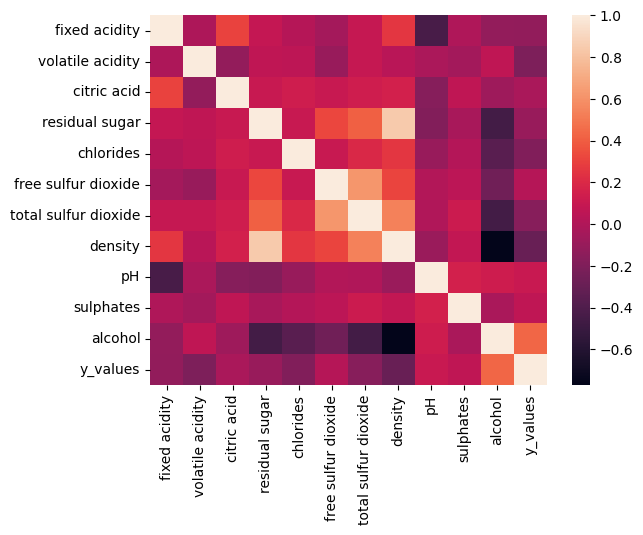

In [132]:
sns.heatmap(df.corr())

In [133]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 20))

Top Absolute Correlations
residual sugar        density                 0.844977
density               alcohol                 0.769838
free sulfur dioxide   total sulfur dioxide    0.617268
total sulfur dioxide  density                 0.533003
                      alcohol                 0.453943
residual sugar        alcohol                 0.452628
fixed acidity         pH                      0.431723
alcohol               y_values                0.430899
residual sugar        total sulfur dioxide    0.411559
chlorides             alcohol                 0.357297
residual sugar        free sulfur dioxide     0.316092
free sulfur dioxide   density                 0.308754
fixed acidity         citric acid             0.302359
density               y_values                0.298520
free sulfur dioxide   alcohol                 0.264288
fixed acidity         density                 0.260211
chlorides             density                 0.256417
volatile acidity      y_values         

In [134]:
x_train_white = pd.read_csv("x_train_white.csv")
x_test_white = pd.read_csv("x_test_white.csv")
y_train_white = pd.read_csv("y_train_white.csv")
y_test_white = pd.read_csv("y_test_white.csv")

In [135]:
columns = ['residual sugar',
'density',
'alcohol',
'free sulfur dioxide',
'total sulfur dioxide',
'fixed acidity',
'pH',
'chlorides',
'citric acid',
'volatile acidity']

x_relevant = x_train_white[columns]
x_relevant

,residual sugar,density,alcohol,free sulfur dioxide,total sulfur dioxide,fixed acidity,pH,chlorides,citric acid,volatile acidity
0,0.021472,0.113553,0.548387,0.031359,0.459397,0.432692,0.272727,0.109792,0.307229,0.323529
1,0.055215,0.101986,0.483871,0.139373,0.255220,0.201923,0.390909,0.086053,0.138554,0.215686
2,0.217791,0.228841,0.274194,0.090592,0.382831,0.355769,0.418182,0.133531,0.138554,0.323529
3,0.102761,0.119722,0.494624,0.108014,0.310905,0.182692,0.536364,0.121662,0.174699,0.225490
4,0.113497,0.159823,0.225806,0.059233,0.213457,0.307692,0.245455,0.142433,0.204819,0.127451
...,...,...,...,...,...,...,...,...,...,...
2947,0.044479,0.054559,0.564516,0.083624,0.139211,0.192308,0.345455,0.183976,0.156627,0.186275
2948,0.268405,0.230769,0.129032,0.108014,0.345708,0.230769,0.390909,0.178042,0.120482,0.264706
2949,0.015337,0.050896,0.629032,0.038328,0.116009,0.134615,0.527273,0.056380,0.198795,0.073529
2950,0.177147,0.165606,0.338710,0.139373,0.357309,0.211538,0.436364,0.115727,0.132530,0.196078


In [136]:
x_test_relevant = x_test_white[columns]

In [137]:
x_relevant.to_csv('x_relevant.csv', index=False)
x_test_relevant.to_csv('x_test_relevant.csv', index=False)